In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob 
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.signal import find_peaks



In [3]:
flist = os.listdir('RGAdata/rga1_Nov_16_2019_02-16-17_PM_ASCII.txt')
N = len(flist)
fdir = 'RGAdata/rga1_Nov_16_2019_02-16-17_PM_ASCII.txt/'


In [4]:
p_sum = np.zeros(1990)

for i in range(N):
    fnamei = fdir + flist[i]
    dfi = pd.read_csv(fnamei,header=18, names=['m','p','col3'], sep=',')
    p_sum = p_sum + np.array(dfi.p)
#     print p_sum[0]
p_av = p_sum/N

df = pd.DataFrame([])
df['m'] = dfi['m']
df['p'] = p_av
df

,m,p
0,1.1,2.415000e-09
1,1.2,2.766000e-09
2,1.3,7.747000e-09
3,1.4,3.884000e-08
4,1.5,7.159000e-08
5,1.6,5.784000e-08
6,1.7,4.679000e-08
7,1.8,4.209000e-08
8,1.9,3.970000e-08
9,2.0,3.851000e-08


In [5]:
# df = pd.read_csv('RGAdata/rga1_Nov_16_2019_02-16-17_PM_ASCII.txt/Nov_16_2019__02-17-40_PM.txt',
#              header=18, names=['m','p','col3'], sep=',')
# df1 = pd.read_csv('RGAdata/rga1_Nov_16_2019_02-16-17_PM_ASCII.txt/Nov_16_2019__02-19-01_PM.txt',
#                header=18, names=['m','p','col3'], sep=',')   


In [6]:
find_peaks(df['p'], height=1e-10, threshold=1e-11)

(array([  4,  30, 113, 123, 133, 144, 154, 163, 173, 194, 214, 255, 265,
        275, 285, 296, 316, 929]),
 {'left_thresholds': array([3.275e-08, 4.130e-07, 6.840e-11, 3.503e-11, 1.920e-10, 2.190e-11,
         4.000e-11, 2.970e-09, 6.650e-09, 3.660e-11, 3.207e-11, 6.782e-11,
         1.241e-10, 7.393e-09, 9.850e-11, 1.318e-11, 8.610e-11, 2.354e-11]),
  'peak_heights': array([7.1590e-08, 6.2980e-06, 1.1330e-09, 1.2728e-10, 1.5930e-09,
         3.4600e-10, 2.5970e-09, 1.5310e-08, 6.4500e-08, 3.5170e-10,
         1.2616e-10, 2.1480e-10, 3.3830e-10, 1.4350e-08, 3.3820e-10,
         1.4648e-10, 3.2350e-10, 1.0023e-10]),
  'right_thresholds': array([1.375e-08, 6.370e-07, 1.348e-10, 1.793e-11, 1.060e-10, 1.022e-10,
         8.500e-10, 1.700e-10, 2.930e-09, 5.480e-11, 2.257e-11, 4.289e-11,
         2.890e-11, 5.307e-09, 2.730e-11, 2.923e-11, 1.061e-10, 1.170e-11])})

In [7]:
idx_peaks = find_peaks(df['p'], height=1e-10, threshold=1e-11)
m_peaks  = np.array(df['m'][idx_peaks[0]])
print m_peaks
print idx_peaks[1]['peak_heights']
print idx_peaks[1]['peak_heights']/(idx_peaks[1]['peak_heights'][1])
ppar =  idx_peaks[1]['peak_heights']

ptot = np.sum(df.p)
print ptot



[ 1.5  4.1 12.4 13.4 14.4 15.5 16.5 17.4 18.4 20.5 22.5 26.6 27.6 28.6
 29.6 30.7 32.7 94. ]
[7.1590e-08 6.2980e-06 1.1330e-09 1.2728e-10 1.5930e-09 3.4600e-10
 2.5970e-09 1.5310e-08 6.4500e-08 3.5170e-10 1.2616e-10 2.1480e-10
 3.3830e-10 1.4350e-08 3.3820e-10 1.4648e-10 3.2350e-10 1.0023e-10]
[1.13671007e-02 1.00000000e+00 1.79898380e-04 2.02095903e-05
 2.52937440e-04 5.49380756e-05 4.12353128e-04 2.43093045e-03
 1.02413465e-02 5.58431248e-05 2.00317561e-05 3.41060654e-05
 5.37154652e-05 2.27850111e-03 5.36995872e-05 2.32581772e-05
 5.13655129e-05 1.59145761e-05]
3.72336194396e-05


#### Calibration

[-0.5  0.1  0.4  0.4  0.4  0.5  0.5  0.4  0.4  0.5  0.5  0.6  0.6  0.6
  0.6  0.7  0.7]
[ 1.5  4.1 12.4 13.4 14.4 15.5 16.5 17.4 18.4 20.5 22.5 26.6 27.6 28.6
 29.6 30.7 32.7]


<IPython.core.display.Javascript object>


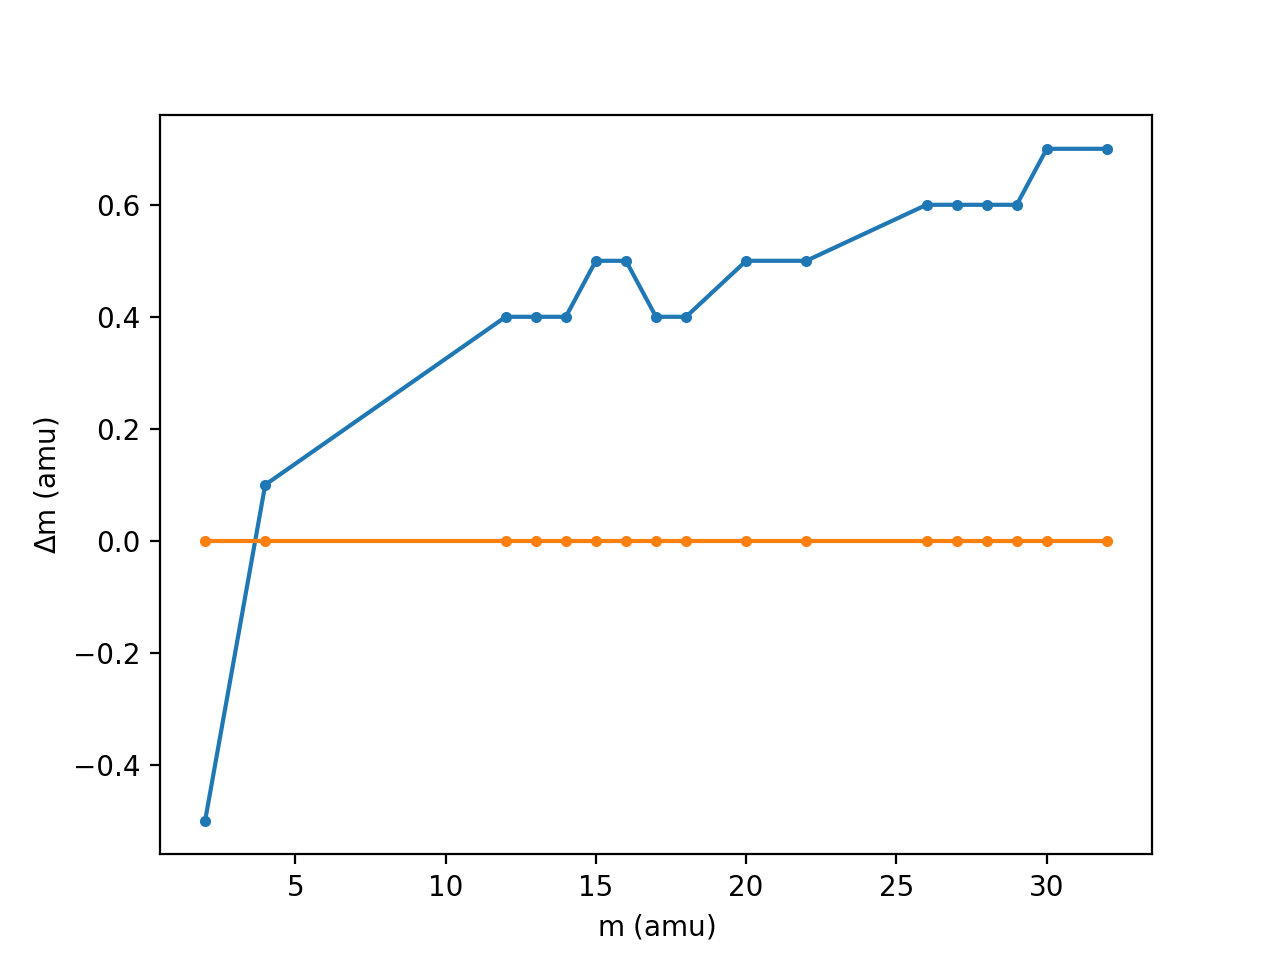

Text(0.5,0,'$\\mathsf{m}$ (amu)')

In [10]:
m_real = np.array([2, 4, 12,13,14,15,16,17,18,20,22,26,27,28,29,30,32])
m_diff = m_peaks[:-1] - m_real
m_corr = np.round(m_peaks-0.5) 
m_corr[0] = 2
print m_diff
print m_peaks[:-1]

# m_peaks_corr = 
fig0, ax0 = plt.subplots(1)
ax0.plot(m_real, m_diff,'.-')
ax0.plot(m_real, m_corr[:-1]-m_real,'.-')
ax0.set_ylabel('$\mathsf{\Delta m}$ (amu)')
ax0.set_xlabel('$\mathsf{m}$ (amu)')


<IPython.core.display.Javascript object>


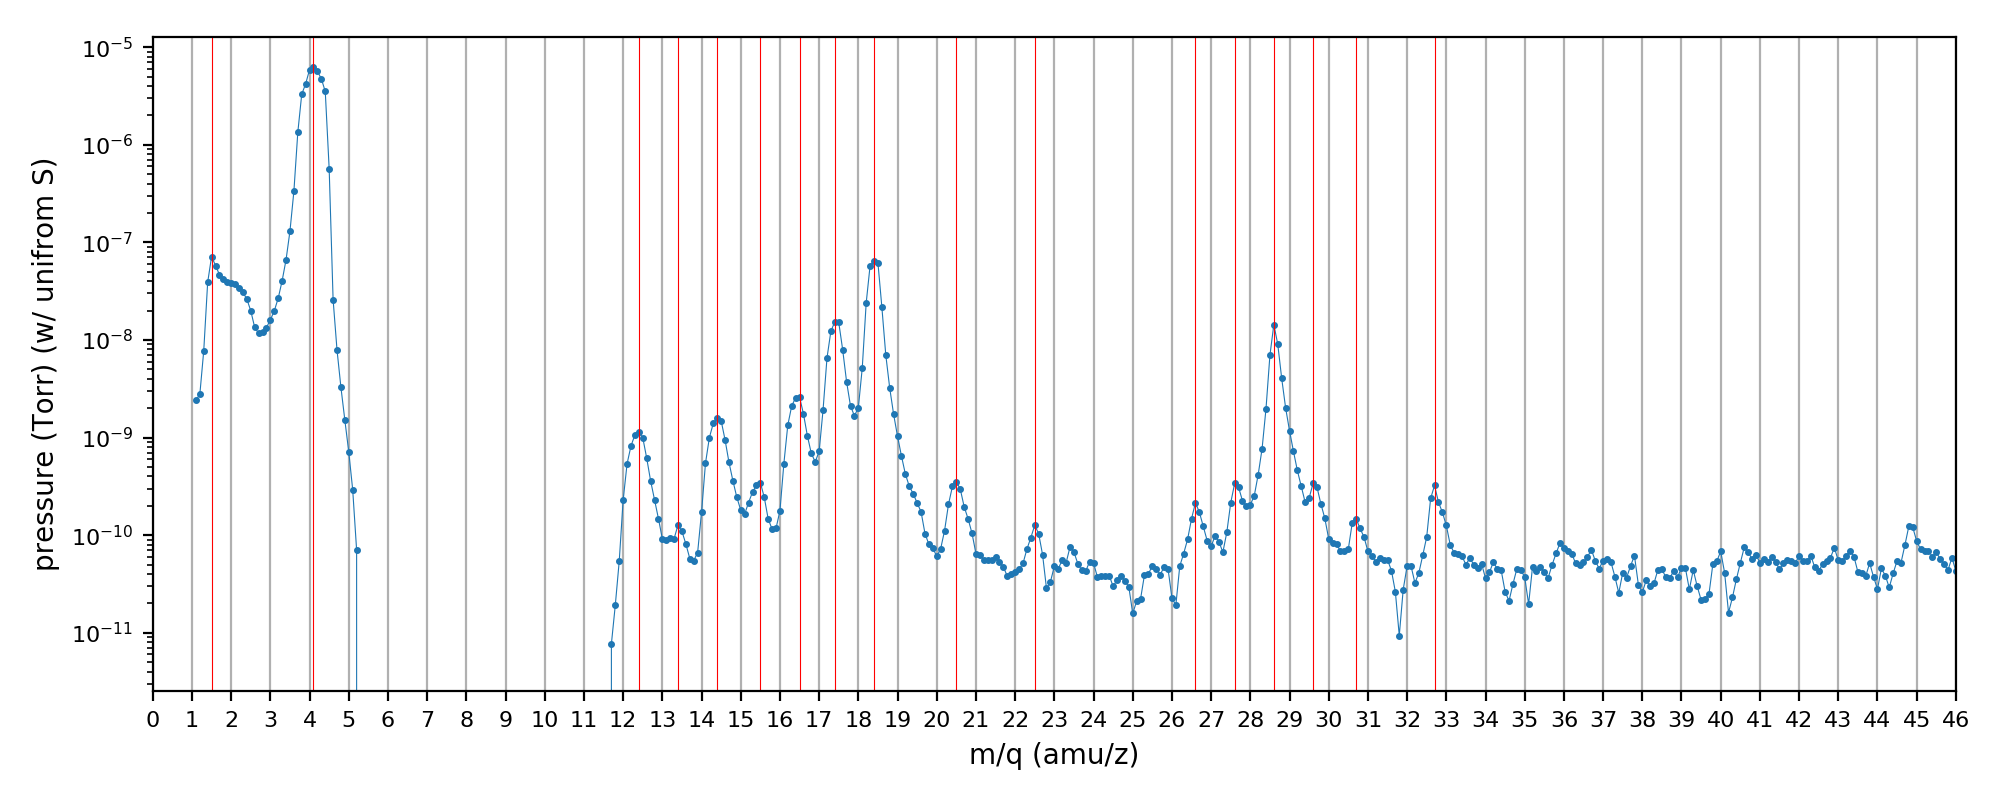

In [9]:
fig, ax = plt.subplots(1, figsize=(10,4))
# ax.plot(df.m, df.p, '.-')
ax.xaxis.grid(True, which='both')
ax.xaxis.grid(True, which='minor', ls='--')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(df['m'], df['p'],'.-', lw=.4, markersize=3)

for mi in m_peaks:
    ax.axvline(mi, lw=.4, c='r')
ax.set_xlim(0,46)
# ax.set_xlim(90,100)
ax.set_yscale('log')
ax.set_xlabel('m/q (amu/z)', fontsize=10)
ax.set_ylabel('pressure (Torr) (w/ unifrom S)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
fig.tight_layout()


4.118301803400001e-05


<IPython.core.display.Javascript object>


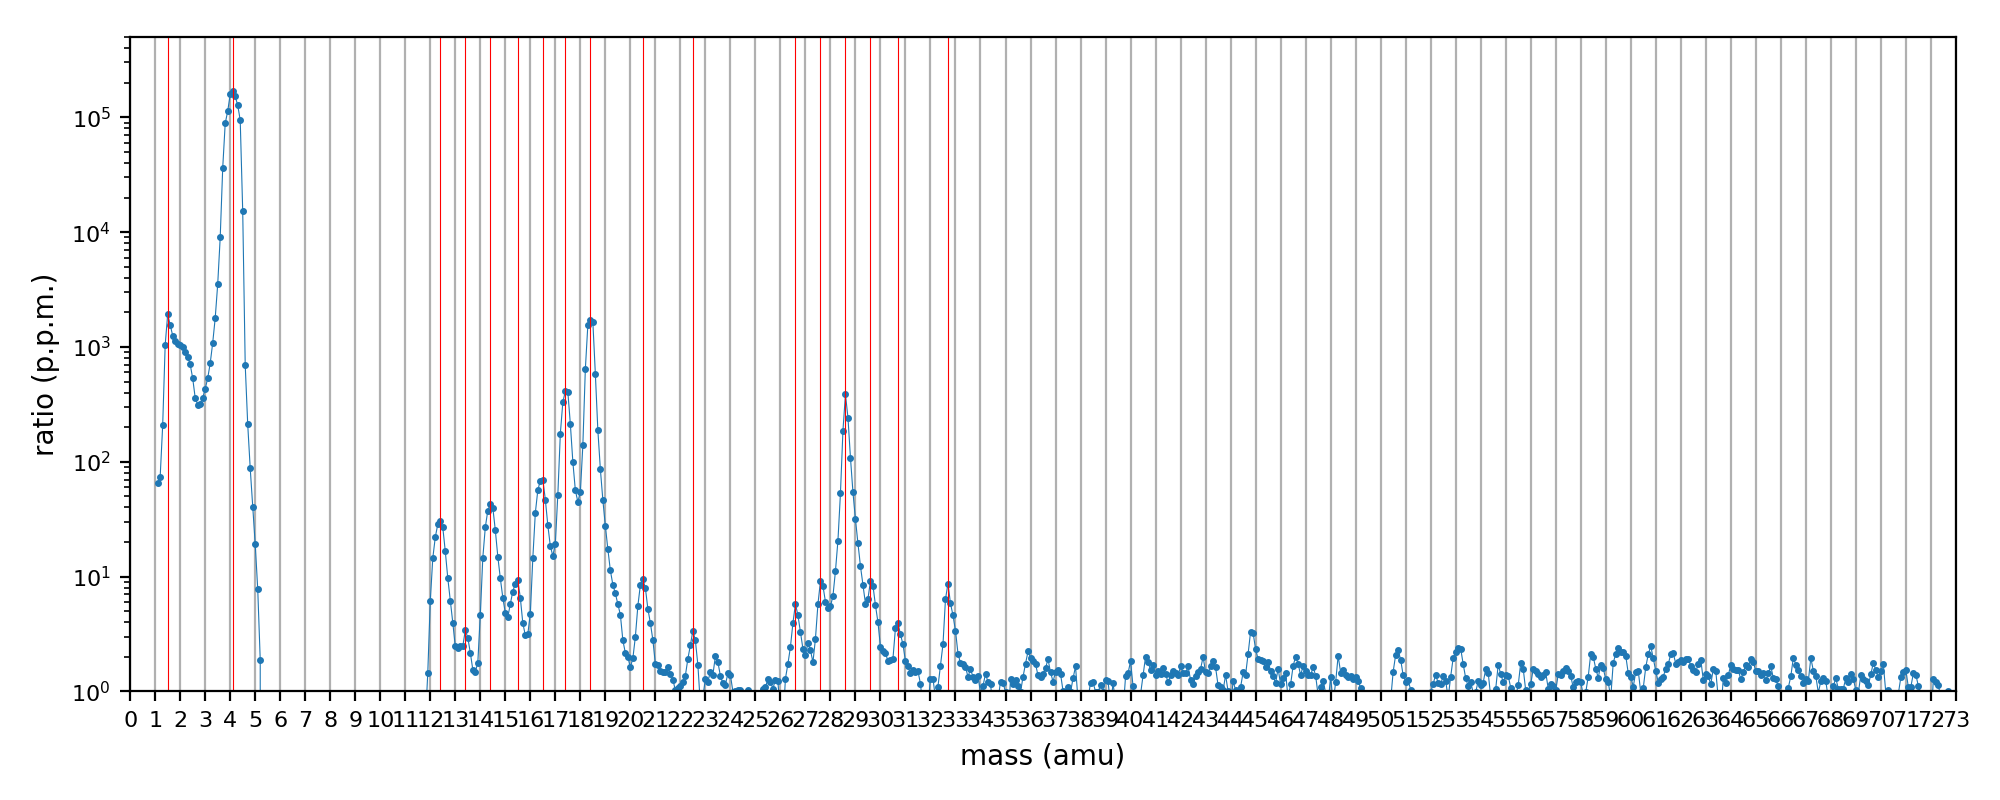

In [234]:
fig1, ax1 = plt.subplots(1, figsize=(10,4))
# ax.plot(df.m, df.p, '.-')
ax1.xaxis.grid(True, which='both')
ax1.xaxis.grid(True, which='minor', ls='--')
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.plot(df['m'], df['p']/ptot*1e6,'.-', lw=.4, markersize=3)
# ax1.plot(df1['m'], df1['p']/ptot*1e6,'.-', lw=.4, markersize=3)


for mi in m_peaks:
    ax1.axvline(mi, lw=.4, c='r')
ax1.set_xlim(0,73)
ax1.set_ylim(1, 5e5)
# ax.set_xlim(0,150)
ax1.set_yscale('log')
ax1.set_xlabel('mass (amu)', fontsize=10)
ax1.set_ylabel('ratio (p.p.m.)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
fig1.tight_layout()


In [170]:
print m_peaks-.4
print ppar/ptot*1e2

[  1.1   3.6  12.   14.   15.1  16.   17.   18.   20.1  26.2  27.2  28.2
  29.2  32.3  84.9  93.6  97.7  98.1 117.4 135.3]
[1.71672702e-01 1.65116602e+01 2.74384942e-03 4.10363320e-03
 8.47436678e-04 7.04173744e-03 4.20076061e-02 1.72643977e-01
 7.96444786e-04 3.35089575e-04 8.91144014e-04 4.32216988e-02
 7.86732045e-04 1.07082973e-03 2.84097683e-04 3.22948648e-04
 4.34645173e-04 3.35089575e-04 2.64672200e-04 3.13235907e-04]


<IPython.core.display.Javascript object>


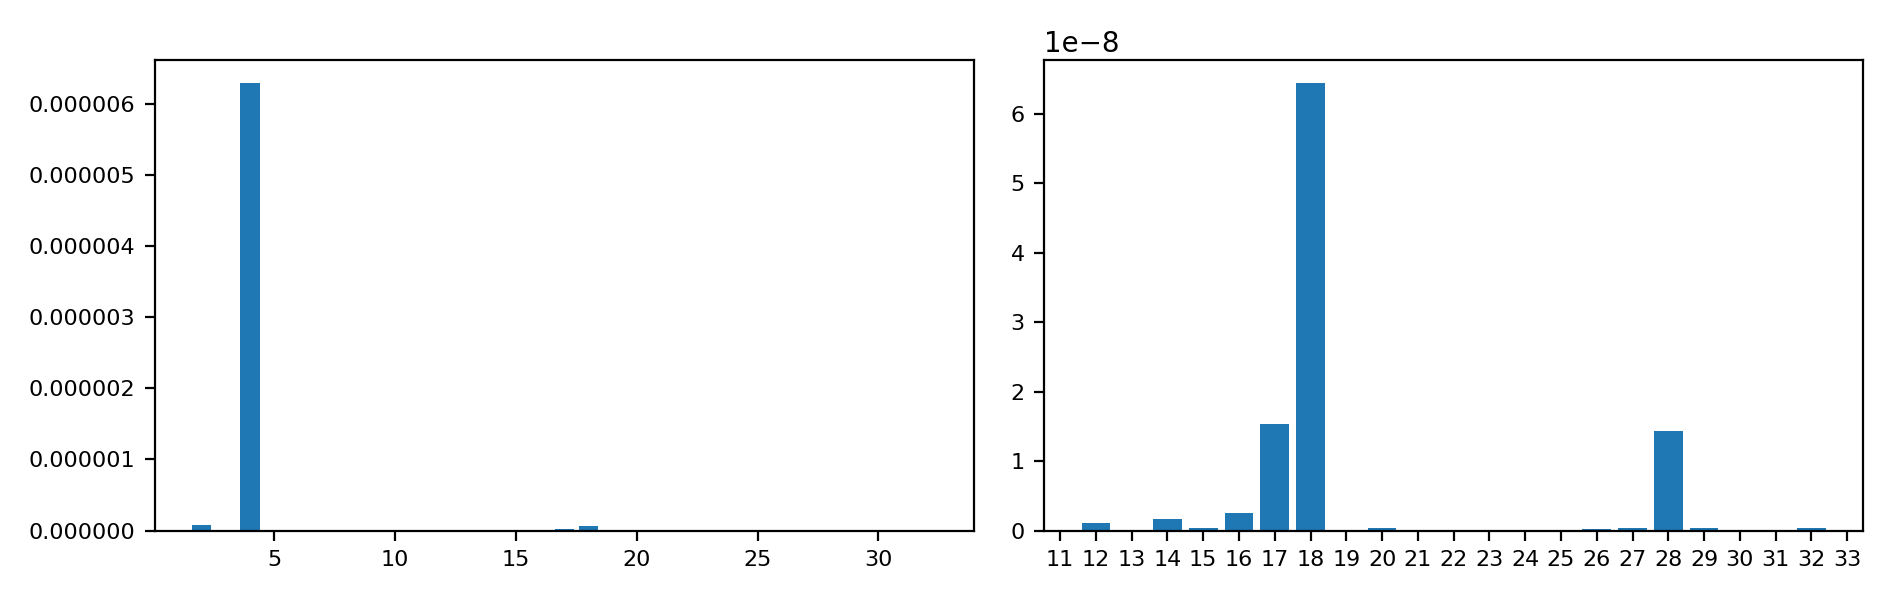

In [232]:
fig2, ax2 = plt.subplots(1,2, figsize=(9.5,3))
# ax2.bar(m_real, ppar[:-1])
ax2[0].bar(m_real[:], ppar[:-1])
ax2[1].bar(m_real[2:], ppar[2:-1])
ax2[1].xaxis.grid(True, which='minor', ls='--')
ax2[1].xaxis.set_major_locator(MultipleLocator(1))
ax2[0].tick_params(axis='both', which='major', labelsize=8)
ax2[1].tick_params(axis='both', which='major', labelsize=8)
fig2.tight_layout()

# ax2.set_y_scale('log')

In [251]:
1/0.18

5.555555555555555